# Signal processing course 2018/2019-1 @ ELTE
# Assignment 2
## 10.01.2018

## Task 3
### Calculating Fourier coefficients numerically<sup>[\[1\]](#footnote1)</sup>

Fourier coefficients can be approximated by numeric integration. Using the trapezoidal rule in the case of the $N + 1$ number of equidistant grid points, defined as

$$
    t_{\nu} = \nu h
$$

where $\nu = 0, 1, \dots, N$ and $h = 2 \pi / N$, the following approximate formulae can be obtained:

$$
\begin{align}
    a_{k} &\approx \tilde{a}_{k} = \frac{2}{N} \sum_{\nu = 1}^{N} f(t_{\nu}) \cos \left( k t_{\nu} \right), \\
    b_{k} &\approx \tilde{b}_{k} = \frac{2}{N} \sum_{\nu = 1}^{N} f(t_{\nu}) \sin \left( k t_{\nu} \right),
\end{align}
$$

where $k = 0, 1, \dots, N$. By analogy, the following formula can be used for the $c_{k}$ coefficients:

$$
    c_{k} \approx \tilde{c}_{k}
    =
    \frac{1}{N} \sum_{\nu = 0}^{N - 1} f(t_{\nu}) e^{-i k t_{\nu}}
$$

where again, $k = 0, 1, \dots, N$ and $\nu = 0, 1, \dots, N-1$.

<a name="footnote1">1</a>: Bronstein, 2009. Typotex, p. 952

In [3]:
import numpy as np

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
# Initialize seaborn with custom settings
# Facecolor values from S. Conradi @S_Conradi/@profConradi
custom_settings = {
    'figure.facecolor': '#f4f0e8',
    'axes.facecolor': '#f4f0e8',
    'axes.edgecolor': '0.7',
    'axes.linewidth' : '2',
    'grid.color': '0.7',
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
}
sns.set_theme(rc=custom_settings)

### Calculating Fourier coefficients

In [189]:
def F_coef(X):
    '''
    Calculates the Fourier coefficients :math:`a_k`, :math:`b_k`.

    Parameters
    ----------
    X : array-like
        The input array of f(t) values sampled in `N` different points.
    '''
    N = len(X)
    t_nu = 2*np.pi * np.arange(0, N, 1) / N
    # Usually we run from `[0 -> N)`, calculating `N` coefficient triplets
    # This will include both `a_0` and `b_0`, the latter being 0 usually
    ak, bk = [np.zeros(N), ] * 2
    for k in range(N):
        # np.sum() represents the sum over nu indices
        ak[k] = 2 / N * np.sum(X * np.cos(k * t_nu))
        bk[k] = 2 / N * np.sum(X * np.sin(k * t_nu))
    return ak, bk

In [190]:
def c_k(k, ak, bk):
    '''
    Calculates the conditional value of :math:`c_k`.
    '''
    if k > 0:
        return 0.5 * (ak[k] - 1j * bk[k])
    elif k == 0:
        return 0.5 * ak[0]
    elif k < 0:
        return np.conj(0.5 * (ak[-k] - 1j * bk[-k]))

### Approximate functions using Fourier series

In [209]:
def rF(ak, bk, T):
    '''
    Approximates a target f(t) function using the sine-cosine form of
    the Fourier series.

    Parameters
    ----------
    ak : array-like
        List of :math:`a_k` coefficients
    bk : array-like
        List of :math:`b_k` coefficients
    T : float
        Period of the evaluated function
    '''
    N = len(ak)
    w0 = 2*np.pi / T
    # The range of x values to evaluate f_N(x) on
    X = np.arange(0, N, 1) / N * T

    Y = np.ones_like(X, dtype=float) * ak[0]/2
    for k in range(1, N):
        Y += ak[k] * np.cos(w0 * k * X) + bk[k] * np.sin(w0 * k * X)
    return Y

In [210]:
def cF(ak, bk, T):
    '''
    Approximates a target f(t) function using the exponential form of
    the Fourier series.

    Parameters
    ----------
    ak : array-like
        List of :math:`a_k` coefficients
    bk : array-like
        List of :math:`b_k` coefficients
    T : float
        Period of the evaluated function
    '''
    N = len(ak)
    w0 = 2*np.pi / T
    # The range of x values to evaluate f_N(x) on
    X = np.arange(0, N, 1) / N * T

    # Sum over 2N+1 number of `k` indices, running between (-N -> N)
    # This is less than in the definition, which runs between [-N -> N]
    Y = np.zeros_like(X, dtype=np.complex128)
    for k in range(-N+1, N):
        Y += c_k(k, ak, bk) * np.exp(1j * w0 * k * X)
    return Y

In [231]:
T = 2*np.pi
X = np.cos(np.linspace(0, T, 100))

In [232]:
ak, bk = F_coef(X)

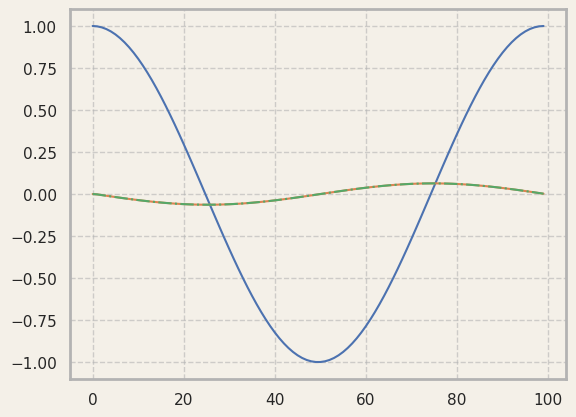

In [233]:
plt.plot(X)
plt.plot(rF(ak, bk, T))
plt.plot(cF(ak, bk, T).real, ls='-.')